In [1]:
# impoeting the libraries
import pandas as pd
# 'Matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is used for plotting statistical graphics
import seaborn as sns

In [2]:
#read the data
df_house_price=pd.read_csv("C:/Users/Win/Documents/Machine Learning/House Price Prediction/Dataset/HousePrices.csv")

In [3]:
df_house_price.shape

(2073, 81)

In [4]:
df_house_price.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

From the above output, we can see that 'Dwell_Type', 'OverallQual' and 'OverallCond' have numerical data type
But as per the data definition, 'Dwell_Type ', 'OverallQual' and 'OverallCond' are categorical variables, so we need to convert these variables data type to 'object'

In [6]:
df_house_price['Dwell_Type'] = df_house_price['Dwell_Type'].astype('O')
df_house_price['OverallQual'] = df_house_price['OverallQual'].astype('O')
df_house_price['OverallCond'] = df_house_price['OverallCond'].astype('O')

In [7]:
# id column is unnecessary which would not be used in model building hence we are removing that
# similarly we see there are only 8 columns in PoolQC column and also if there is no pool than area is also not there, so we will
# remove these two variables 
df_house_price.drop('Id',axis=1,inplace=True)
# use drop() to drop the redundant variables
df_house_price= df_house_price.drop(['PoolQC', 'PoolArea'], axis= 1)
df_house_price.shape




(2073, 78)

# Missing Values


In [8]:
miss_val=df_house_price.isnull().sum()
print(type(miss_val))

<class 'pandas.core.series.Series'>


In [9]:
# Finding all those columns which have missing values
print(miss_val[miss_val>0])
print("\nThe Number of Columnns which have missing values is {}".format(len(miss_val[miss_val>0])))

LotFrontage      320
Alley           1944
MasVnrType        14
MasVnrArea        14
BsmtQual          59
BsmtCond          59
BsmtExposure      61
BsmtFinType1      59
BsmtFinType2      60
Electrical         1
FireplaceQu      988
GarageType       113
GarageYrBlt      113
GarageFinish     113
GarageQual       113
GarageCond       113
Fence           1669
MiscFeature     1993
dtype: int64

The Number of Columnns which have missing values is 18


# Summary Statistics

In [10]:
df_house_price.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1753.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,72.056475,10717.853353,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,...,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,39.736614,6.287506,2007.851905,180967.284129
std,27.987475,9215.982306,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,...,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,429.819512,2.690130,1.329705,78666.411112
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7620.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,70.000000,9492.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,...,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,83.000000,11601.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,...,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df_house_price.describe(include='object')

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,2073,129,2073,2073,2073,2073,2073,2073,...,1085,1960,1960,1960,1960,2073,404,80,2073,2073
unique,18,5,2,2,4,4,2,5,3,25,...,5,6,3,5,5,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Gd,Attchd,Unf,TA,TA,Y,MnPrv,Shed,WD,Normal
freq,722,1611,2063,72,1300,1854,2070,1481,1958,317,...,530,1252,857,1870,1885,1913,233,74,1797,1695


# Finding Outliers

In [12]:
# FINDING OUTLIERS IN TARGET VARIABLE SALES_PRICE
IQR=df_house_price['Property_Sale_Price'].quantile(.75)-df_house_price['Property_Sale_Price'].quantile(.25)
UL= df_house_price['Property_Sale_Price'].quantile(.75)+ (1.5* IQR)
print("The Upper Limit is",UL)
LL= df_house_price['Property_Sale_Price'].quantile(.25)-(1.5* IQR)
print("The Lower limit is",LL)

The Upper Limit is 340000.0
The Lower limit is 4000.0


In [13]:
# FINDING OUTLIERS IN TARGET VARIABLE SALES_PRICE
print("count of columns whose value greater than upper limit = {}".format(len(df_house_price[df_house_price['Property_Sale_Price']>UL])))


count of columns whose value greater than upper limit = 78


In [15]:
print("count of columns whose value less than lower limit = {}".format(len(df_house_price[df_house_price['Property_Sale_Price']<LL])))

count of columns whose value less than lower limit = 0


In [39]:
# so there are 78 outliers in sales_price column, since, it is a regression problem we would replace these columns with Upper Limit

df_house_price.loc[df_house_price.Property_Sale_Price>UL,'Property_Sale_Price']=UL

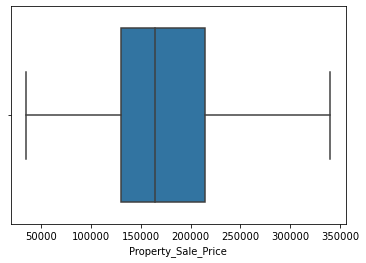

In [19]:
# checking if outliers still exist
sns.boxplot(x='Property_Sale_Price', data= df_house_price)
plt.show()

# Treating Missing Values

In [20]:
# Creating a data frame with missing values and their data type
df_miss_val=pd.DataFrame()
df_miss_val['Missing_Value']=miss_val[miss_val>0]
df_miss_val['Data Type']=df_house_price[df_miss_val].dtypes
df_miss_val

,Missing_Value,Data Type
LotFrontage,320,float64
Alley,1944,object
MasVnrType,14,object
MasVnrArea,14,float64
BsmtQual,59,object
BsmtCond,59,object
BsmtExposure,61,object
BsmtFinType1,59,object
BsmtFinType2,60,object
Electrical,1,object


Now seperating the missing value columns to categorical and numerical columns


In [21]:
# categorical columns
miss_cat_col=df_miss_val[df_miss_val['Data Type']=='object']
print(type(miss_cat_col))
miss_cat_col.sort_values('Missing_Value',ascending=False)

<class 'pandas.core.frame.DataFrame'>


,Missing_Value,Data Type
MiscFeature,1993,object
Alley,1944,object
Fence,1669,object
FireplaceQu,988,object
GarageType,113,object
GarageFinish,113,object
GarageQual,113,object
GarageCond,113,object
BsmtExposure,61,object
BsmtFinType2,60,object


In [22]:
# Now we will remove missing values for each column in this categorical variable list based on problem statement
df_house_price['MiscFeature']=df_house_price['MiscFeature'].fillna('None')

In [23]:
df_house_price['Alley']=df_house_price['Alley'].fillna('No Alley')

In [24]:
df_house_price['Fence']=df_house_price['Fence'].fillna('No Fence')

In [25]:
df_house_price['FireplaceQu']=df_house_price['FireplaceQu'].fillna('No Fireplace')

In [26]:
Garagecol=['GarageType','GarageFinish','GarageQual','GarageCond']
for col in Garagecol:
    df_house_price[col]=df_house_price[col].fillna('No Garage')

In [27]:
Basement=['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond']
for col in Basement:
    df_house_price[col]=df_house_price[col].fillna('No Basement')

In [28]:
df_house_price['MasVnrType']=df_house_price['MasVnrType'].fillna('None')

In [29]:
# here replacing by mode since it is a categorical variable
df_house_price['Electrical']=df_house_price['Electrical'].fillna(df_house_price['Electrical'].mode()[0])

In [30]:
miss_val=df_house_price.isnull().sum()
miss_val[miss_val>0]

LotFrontage    320
MasVnrArea      14
GarageYrBlt    113
dtype: int64

In [31]:
# Now Treating a the missing numerical columns

In [32]:
df_house_price['LotFrontage']=df_house_price['LotFrontage'].fillna(df_house_price['LotFrontage'].median())

In [33]:
df_house_price['GarageYrBlt']=df_house_price['GarageYrBlt'].fillna(0)

In [34]:
df_house_price['MasVnrArea'].median()

0.0

In [35]:
miss_val=df_house_price.isnull().sum()
miss_val[miss_val>0]

MasVnrArea    14
dtype: int64

In [36]:
df_house_price.MasVnrArea

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
2068    298.0
2069      0.0
2070      0.0
2071    541.0
2072      0.0
Name: MasVnrArea, Length: 2073, dtype: float64

In [41]:
df_house_price.MasVnrArea.skew()

2.576899829940904

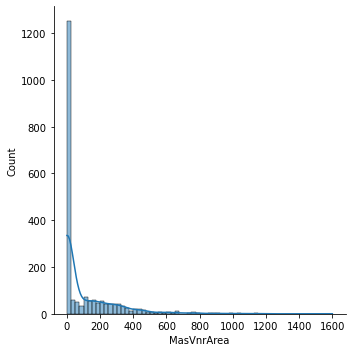

In [40]:
sns.displot(df_house_price['MasVnrArea'], kde=True)
plt.show()

we see that the data is positivey skewed

In [44]:
df_house_price['MasVnrArea'].median()

0.0

In [46]:
# median here is 0.0

df_missing = df_house_price.loc[df_house_price.MasVnrArea.isnull(), ['MasVnrArea','Dwell_Type']]
df_missing

,MasVnrArea,Dwell_Type
234,NaN,60
529,NaN,20
650,NaN,60
936,NaN,20
973,NaN,20
977,NaN,120
1243,NaN,20
1278,NaN,60
1520,NaN,20
1524,NaN,120


In [51]:
d=df_house_price.groupby('Dwell_Type')['MasVnrArea'].median().round(0)

In [52]:
df_house_price.loc[df_missing.index, 'MasVnrArea'] = df_house_price.loc[df_missing.index, 'Dwell_Type'].apply(lambda x: d.loc[x])

In [54]:
df_house_price.isnull().sum()

Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
                      ..
MoSold                 0
YrSold                 0
SaleType               0
SaleCondition          0
Property_Sale_Price    0
Length: 78, dtype: int64

# Checking normality of data

<AxesSubplot:>

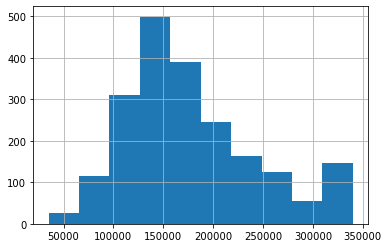

In [55]:
df_house_price.Property_Sale_Price.hist()

In [57]:
df_house_price.Property_Sale_Price.skew() # slightly positive skewed, we will solve this by log normalization

0.7881216545326494

In [59]:
import numpy as np
df_house_price.Property_Sale_Price=np.log(df_house_price.Property_Sale_Price)
df_house_price.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,No Fence,None,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,0,No Fence,None,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,No Fence,None,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,0,No Fence,None,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,0,No Fence,None,0,12,2008,WD,Normal,12.429216


In [60]:
df_house_price.Property_Sale_Price.skew()

-0.22636253248598062

# converting all object types to numeric by one hot encoding

In [63]:
df_get_dummy=pd.get_dummies(df_house_price,drop_first=True)
df_get_dummy

C:\Users\Win\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,70.0,8755,1936,1999,298.0,772,0,220,992,1022,...,0,0,0,0,1,0,0,0,1,0
2069,63.0,7711,1936,1977,0.0,1440,0,0,1440,1440,...,0,0,0,1,0,0,0,0,0,0
2070,313.0,25000,1983,1996,0.0,0,0,1632,1632,1632,...,0,0,0,0,1,0,0,0,1,0
2071,52.0,14375,1958,1958,541.0,111,354,354,819,1344,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))